# Thresholding group level results and Visualization

*Yiyu Wang 2024 Feb*


In [11]:
import os

import glob
import nibabel as nib
import numpy as np
import pandas as pd
import copy

import nilearn
from nilearn.image import smooth_img, resample_to_img,new_img_like, math_img, concat_imgs, get_data
from nilearn import image
from nilearn import plotting
from nilearn.masking import apply_mask
from nilearn.input_data import NiftiMasker
from nilearn.glm.second_level import SecondLevelModel
from nilearn.reporting import get_clusters_table
from nilearn.glm import threshold_stats_img
from scipy.stats import norm

from nilearn.datasets import load_mni152_gm_mask,load_mni152_wm_mask,fetch_surf_fsaverage


import gzip
import math

import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join


In [12]:
# load image:

#which_model = 'OneSampleT_2lvl'
# which_model = 'OneSampleT_3lvl'
which_model = 'PairedT_2ndlvl'

which_contrast = 'obs_social_pattern' # 
# which_contrast = 'interaction' 
# which_contrast = 'main_PE'
# which_contrast = 'fb_PE_congruent'
# which_contrast = 'pattern_fb_PE_congruent'
# which_contrast = 'social_fb_PE_congruent'


beta_dir = f'model_norating_fmri_results/{which_model}'

In [20]:

fwe = 5.14
for which_model in ['OneSampleT_2lvl', 'OneSampleT_3lvl', 'PairedT_2ndlvl']:
# for which_model in ['PairedT_2ndlvl']:
    beta_dir = f'Model_RatingOnset_fmri_results/{which_model}'
    print(f'\nwhich_model = {which_model}')
    for which_contrast in ['obs_social_pattern', 'interaction', 'main_PE', 'fb_PE_congruent', 'fb_pattern_PE_congruent', 'fb_social_PE_congruent']:
        print(f'which_contrast = {which_contrast}')
        z_map = nib.load(beta_dir + f'/{which_contrast}_z_score.nii.gz')
        # _, fwe = threshold_stats_img(z_map, alpha=0.05, height_control='bonferroni', cluster_threshold=30)
        print(f'fwe = {fwe}')
        print(f'max voxel value = {z_map.get_fdata().max()}')
        print(f'min voxel value = {z_map.get_fdata().min()}')
    


which_model = OneSampleT_2lvl
which_contrast = obs_social_pattern
fwe = 5.14
max voxel value = 3.6429641716732943
min voxel value = -2.7763489518178788
which_contrast = interaction
fwe = 5.14
max voxel value = 4.000242054912808
min voxel value = -3.112636449412635
which_contrast = main_PE
fwe = 5.14
max voxel value = 3.451240158535054
min voxel value = -5.702507049744487
which_contrast = fb_PE_congruent
fwe = 5.14
max voxel value = 3.44844547624027
min voxel value = -5.42390771890837
which_contrast = fb_pattern_PE_congruent
fwe = 5.14
max voxel value = 4.027725098399985
min voxel value = -6.1613564552137285
which_contrast = fb_social_PE_congruent
fwe = 5.14
max voxel value = 2.603146481329869
min voxel value = -4.3633935343186865

which_model = OneSampleT_3lvl
which_contrast = obs_social_pattern
fwe = 5.14
max voxel value = 4.52650898472606
min voxel value = -3.604469065976456
which_contrast = interaction
fwe = 5.14
max voxel value = 5.856023052171699
min voxel value = -5.380205895286

In [19]:
fwe = 5.14
for which_model in ['OneSampleT_2lvl', 'OneSampleT_3lvl', 'PairedT_2ndlvl']:
# for which_model in ['PairedT_2ndlvl']:
    beta_dir = f'model_norating_fmri_results/{which_model}'
    print(f'\nwhich_model = {which_model}')
    for which_contrast in ['obs_social_pattern', 'interaction', 'main_PE', 'fb_PE_congruent', 'fb_pattern_PE_congruent', 'fb_social_PE_congruent']:
        print(f'which_contrast = {which_contrast}')
        z_map = nib.load(beta_dir + f'/{which_contrast}_z_score.nii.gz')
        # _, fwe = threshold_stats_img(z_map, alpha=0.05, height_control='bonferroni', cluster_threshold=30)
        print(f'fwe = {fwe}')
        print(f'max voxel value = {z_map.get_fdata().max()}')
        print(f'min voxel value = {z_map.get_fdata().min()}')
    


which_model = OneSampleT_2lvl
which_contrast = obs_social_pattern
fwe = 5.14
max voxel value = 3.4861167333233634
min voxel value = -2.7580203050964363
which_contrast = interaction
fwe = 5.14
max voxel value = 5.130981536641678
min voxel value = -3.6776383642358046
which_contrast = main_PE
fwe = 5.14
max voxel value = 3.6388746062336828
min voxel value = -5.759971375751789
which_contrast = fb_PE_congruent
fwe = 5.14
max voxel value = 3.6281264590150757
min voxel value = -5.37910504497078
which_contrast = fb_pattern_PE_congruent
fwe = 5.14
max voxel value = 3.864277529149974
min voxel value = -6.7079637958660046
which_contrast = fb_social_PE_congruent
fwe = 5.14
max voxel value = 2.7842026212997095
min voxel value = -3.400005838197903

which_model = OneSampleT_3lvl
which_contrast = obs_social_pattern
fwe = 5.14
max voxel value = 4.730902651176177
min voxel value = -3.419279368772976
which_contrast = interaction
fwe = 5.14
max voxel value = 6.092518757011305
min voxel value = -5.9509785

In [14]:
fwe = 5.149
print(f'fwe = {fwe}')   
for which_model in ['OneSampleT_2lvl', 'OneSampleT_3lvl', 'PairedT_2ndlvl']:
# for which_model in ['PairedT_2ndlvl']:
    beta_dir = f'model_norating_fmri_results/{which_model}'
    print(f'\nwhich_model = {which_model}')
    for which_contrast in ['obs_social_pattern', 'interaction', 'main_PE', 'fb_PE_congruent', 'fb_pattern_PE_congruent', 'fb_social_PE_congruent']:
        print(f'which_contrast = {which_contrast}')
        z_map = nib.load(beta_dir + f'/{which_contrast}_z_score.nii.gz')
        _, fdr = threshold_stats_img(z_map, alpha=0.05, height_control='fdr', cluster_threshold=30)
        print(f'fdr = {fdr}')
        print(f'max voxel value = {z_map.get_fdata().max()}')
    

fwe = 5.149

which_model = OneSampleT_2lvl
which_contrast = obs_social_pattern


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.4861167333233634. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 3.4861167333233634
which_contrast = interaction
fdr = 3.8985800090265803
max voxel value = 5.130981536641678
which_contrast = main_PE
fdr = 3.903292987736312
max voxel value = 3.6388746062336828
which_contrast = fb_PE_congruent
fdr = 3.989901562848513
max voxel value = 3.6281264590150757
which_contrast = fb_pattern_PE_congruent
fdr = 3.470831174067695
max voxel value = 3.864277529149974
which_contrast = fb_social_PE_congruent


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.400005838197903. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 2.7842026212997095

which_model = OneSampleT_3lvl
which_contrast = obs_social_pattern


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.730902651176177. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 4.730902651176177
which_contrast = interaction
fdr = 2.853183955276285
max voxel value = 6.092518757011305
which_contrast = main_PE
fdr = 2.8206535448969383
max voxel value = 4.941261744419585
which_contrast = fb_PE_congruent


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.7917926876932437. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 3.517386066663037
which_contrast = fb_pattern_PE_congruent
fdr = 2.1538084876847607
max voxel value = 11.908241687996963
which_contrast = fb_social_PE_congruent
fdr = 3.8745797719779387
max voxel value = 4.683319935802479

which_model = PairedT_2ndlvl
which_contrast = obs_social_pattern


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.68770489785647. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 4.68770489785647
which_contrast = interaction
fdr = 4.429919483620408
max voxel value = 4.298413973073893
which_contrast = main_PE


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 2.9613670093291087. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 2.9613670093291087
which_contrast = fb_PE_congruent


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 2.9862747142842863. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 2.9862747142842863
which_contrast = fb_pattern_PE_congruent


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.034110983738506. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


fdr = inf
max voxel value = 4.034110983738506
which_contrast = fb_social_PE_congruent
fdr = 4.121530012235392
max voxel value = 4.626035198820533


In [4]:
z_map = nib.load(beta_dir + f'/obs_social_pattern_z_score.nii.gz')


z_vals = z_map.get_fdata().flatten()
alpha = 0.05
z_vals_ = -np.sort(-z_vals)
p_vals = norm.sf(z_vals_)
n_samples = len(p_vals)
pos = p_vals < alpha * np.linspace(1 / n_samples, 1, n_samples)
fdr = z_vals_[pos][-1] - 1.0e-12 if pos.any() else np.inf

print(f'fdr = {fdr}')

fdr = inf


/Users/yiyuwang/anaconda3/envs/neuroimaging_env/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 5.017728254482691. But, you have given threshold=5.149072733780298.
  f"The given float value must not exceed {value_check}. "


fwe = 5.149072733780298
max voxel value = 4.626035198820533


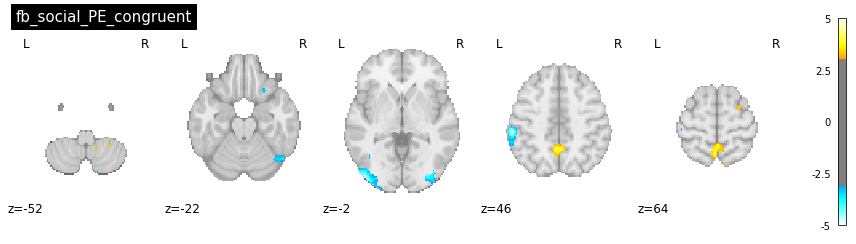

In [6]:
z_map = nib.load(beta_dir + f'/{which_contrast}_z_score.nii.gz')

fwe_corrected, fwe = threshold_stats_img(z_map, alpha=0.05, height_control='bonferroni', cluster_threshold=40)
print(f'fwe = {fwe}')
print(f'max voxel value = {z_map.get_fdata().max()}')
plotting.plot_stat_map(z_map, threshold=3.1, display_mode='z', cut_coords=5, colorbar=True, title=which_contrast)